In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [55]:
df = pd.read_csv('barrier_variance.csv')
print(df.shape)
df.head(20)

(216, 7)


,dH sigma,dS sigma,effective barrier,permeability,max barrier,max enthalpic barrier,max entropic barrier
0,0.0001,0.0001,6.276711,2.990039e+03,10.649958,4.500468,-0.019536
1,0.0001,0.0010,6.351410,2.637691e+03,11.943146,4.500493,-0.015577
2,0.0001,0.0005,6.294860,2.900327e+03,11.150542,4.500466,-0.017723
3,0.0001,0.0001,6.276711,2.990040e+03,10.636836,4.500441,-0.019562
4,0.0001,0.0050,7.970603,1.741317e+02,17.136135,4.500499,0.001958
5,0.0001,0.0010,6.350242,2.642866e+03,11.917944,4.500463,-0.015681
6,0.0001,0.0500,33.025230,9.479083e-17,79.657579,4.500434,0.197072
7,0.0001,0.0100,11.089766,9.270357e-01,23.608110,4.500429,0.024245
8,0.0001,0.1000,62.352329,3.964099e-38,146.055463,4.500488,0.402577
9,0.0001,0.5000,235.625028,1.937628e-164,703.914903,4.500423,2.200142


In [71]:
dS_sigs = np.sort([a for a in df['dS sigma'].value_counts().index])
dH_sigs = np.sort([a for a in df['dH sigma'].value_counts().index])
print(dS_sigs)
print(dH_sigs)

[1.0e-04 5.0e-04 1.0e-03 5.0e-03 1.0e-02 5.0e-02 1.0e-01 5.0e-01 7.5e-01
 9.0e-01]
[1.0e-04 1.0e-03 1.0e-02 5.0e-02 1.0e-01 5.0e-01 1.0e+00 1.5e+00 2.0e+00
 2.5e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00 1.0e+01]


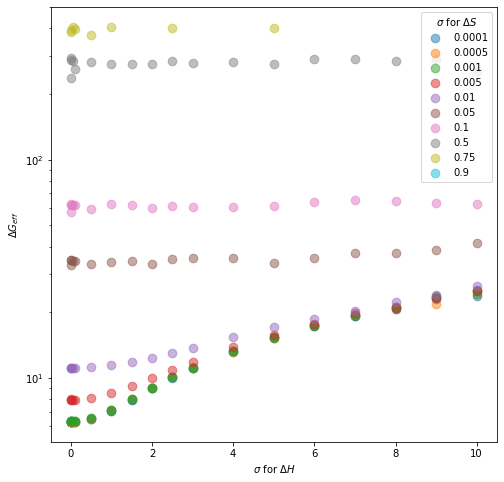

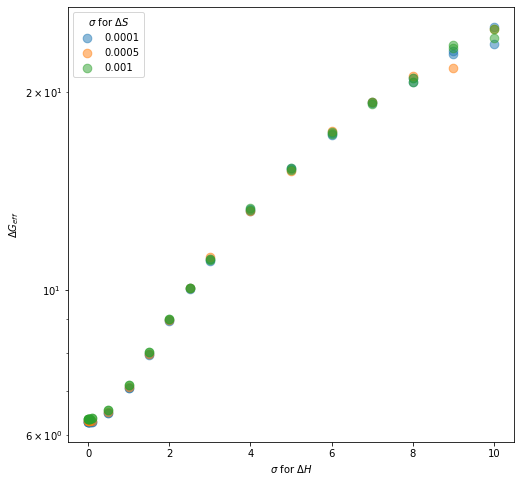

In [60]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for s in dS_sigs:
    df1 = df[df['dS sigma'] == s]
    ax.set_yscale('log')
    ax.scatter(df1['dH sigma'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax.set_xlabel('$\sigma$ for $\Delta H$')
ax.set_ylabel('$\Delta G_{eff}$')
ax.legend(title='$\sigma$ for $\Delta S$');


fig, ax = plt.subplots(1,1, figsize=(8,8))

for s in dS_sigs[:3]:
    df1 = df[df['dS sigma'] == s]
    ax.set_yscale('log')
    ax.scatter(df1['dH sigma'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax.set_xlabel('$\sigma$ for $\Delta H$')
ax.set_ylabel('$\Delta G_{eff}$')
ax.legend(title='$\sigma$ for $\Delta S$');

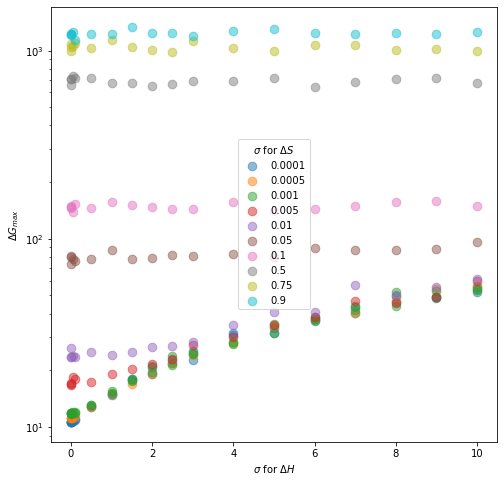

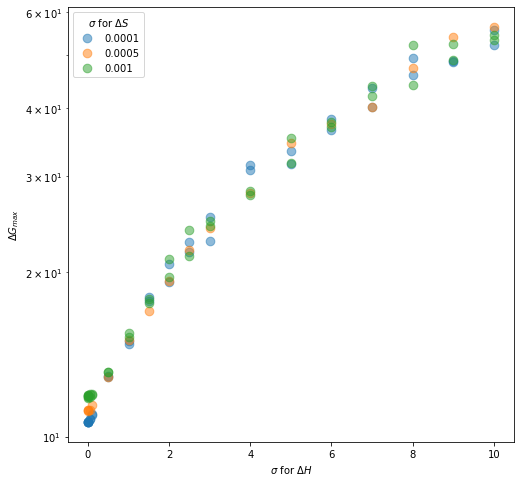

In [61]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

for s in dS_sigs:
    df1 = df[df['dS sigma'] == s]
    ax.set_yscale('log')
    ax.scatter(df1['dH sigma'], df1['max barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax.set_xlabel('$\sigma$ for $\Delta H$')
ax.set_ylabel('$\Delta G_{max}$')
ax.legend(title='$\sigma$ for $\Delta S$');


fig, ax = plt.subplots(1,1, figsize=(8,8))

for s in dS_sigs[:3]:
    df1 = df[df['dS sigma'] == s]
    ax.set_yscale('log')
    ax.scatter(df1['dH sigma'], df1['max barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax.set_xlabel('$\sigma$ for $\Delta H$')
ax.set_ylabel('$\Delta G_{max}$')
ax.legend(title='$\sigma$ for $\Delta S$');

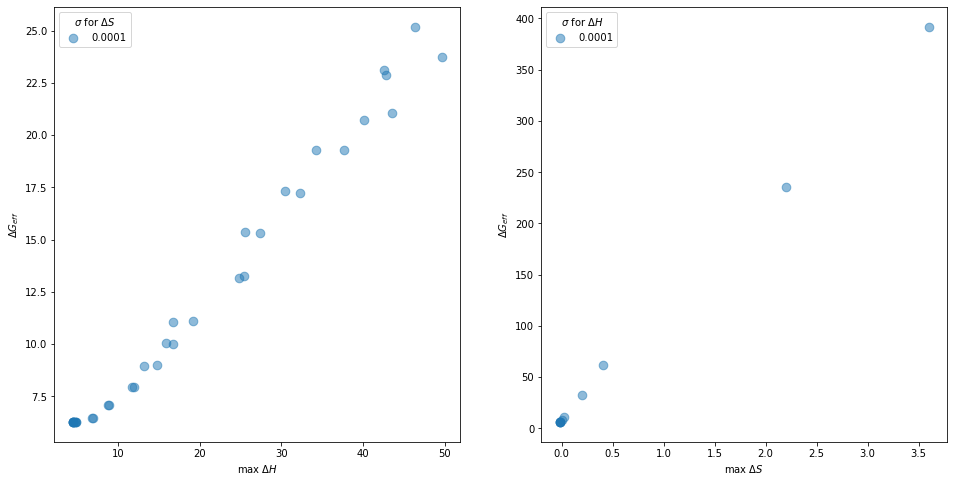

In [75]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

s = dS_sigs[0]
df1 = df[df['dS sigma'] == s]
ax[0].scatter(df1['max enthalpic barrier'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax[0].set_xlabel('max $\Delta H$')
ax[0].set_ylabel('$\Delta G_{eff}$')
ax[0].legend(title='$\sigma$ for $\Delta S$')

s = dH_sigs[0]
df1 = df[df['dH sigma'] == s]
ax[1].scatter(df1['max entropic barrier'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

ax[1].set_xlabel('max $\Delta S$')
ax[1].set_ylabel('$\Delta G_{eff}$')
ax[1].legend(title='$\sigma$ for $\Delta H$');

In [76]:
df = pd.read_csv('barrier_variance_ROC.csv')
print(df.shape)
df.head()

(259200, 6)


,paths,permeability,permeability percent,dH sigma,dS sigma,model
0,1,2.493354,0.083389,0.0001,0.0001,1.0
1,2,2.485359,0.083121,0.0001,0.0001,1.0
2,3,2.485160,0.083115,0.0001,0.0001,1.0
3,4,2.494322,0.083421,0.0001,0.0001,1.0
4,5,2.496824,0.083505,0.0001,0.0001,1.0


100%|██████████| 10/10 [00:00<00:00, 16.55it/s]


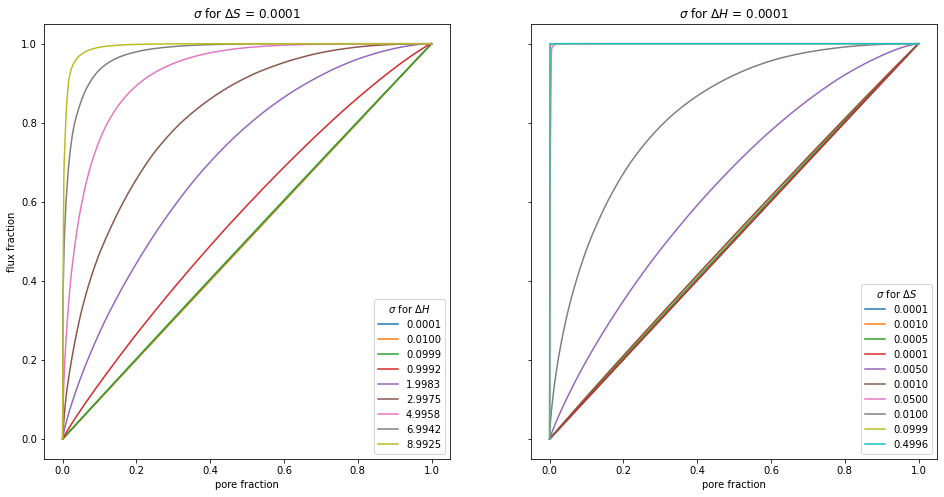

In [109]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

s = dS_sigs[0]
df1 = df[df['dS sigma'] == s]
models = np.sort([a for a in df1['model'].value_counts().index])
ax[0].set_title(f'$\sigma$ for $\Delta S$ = {s}')

for m in tqdm(models[::4]):
    df2 = df1[df1.model == m].sort_values('permeability percent', ascending=False)
    n_paths = df2.paths.max()

    df2['flux fraction'] = df2['permeability percent'].cumsum() / 100
    df2['pore fraction'] = np.arange(1,n_paths+1) / n_paths
    df2.loc[len(df2.index)] = [0,0,0,0,0,m,0,0] # add zero row for ROC curve

    sns.lineplot(data=df2, x='pore fraction', y='flux fraction', ax=ax[0], 
                 label=f"{df2['dH sigma'].mean():.4f}")
    

ax[0].legend(title='$\sigma$ for $\Delta H$');

s = dH_sigs[0]
df1 = df[df['dH sigma'] == s]
models = np.sort([a for a in df1['model'].value_counts().index])
ax[1].set_title(f'$\sigma$ for $\Delta H$ = {s}')

for m in tqdm(models[:-2]):
    df2 = df1[df1.model == m].sort_values('permeability percent', ascending=False)
    n_paths = df2.paths.max()

    df2['flux fraction'] = df2['permeability percent'].cumsum() / 100
    df2['pore fraction'] = np.arange(1,n_paths+1) / n_paths
    df2.loc[len(df2.index)] = [0,0,0,0,0,m,0,0] # add zero row for ROC curve

    sns.lineplot(data=df2, x='pore fraction', y='flux fraction', ax=ax[1], 
                 label=f"{df2['dS sigma'].mean():.4f}")
    

ax[1].legend(title='$\sigma$ for $\Delta S$');